In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load data

df = pd.read_csv("train.csv")
df.head(10)

,Id,rating,date,variation,verified_reviews,feedback
0,1916,5,26-Jul-18,White Plus,I love it. Use it mostly for the music huge re...,1
1,500,5,24-Jun-18,Black,There's really no dislike for Alexa( dot) I th...,1
2,2958,5,30-Jul-18,Black Dot,I love searching the Alexa skill shop on the a...,1
3,1968,5,25-Jul-18,White Plus,I love my Echo Plus and have cousins from Ital...,1
4,156,4,30-Jul-18,Charcoal Fabric,i have not found a way to access my echo thoro...,1
5,83,5,30-Jul-18,Heather Gray Fabric,I purchased an echo dot for my husband for Fat...,1
6,2973,4,30-Jul-18,Black Dot,I'm amazed with the alarm. I tell Alexa to wak...,1
7,579,1,10-Jun-18,Black,"great product, but useless overall. Too many u...",0
8,176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
9,1964,5,25-Jul-18,Black Plus,This is a very useful device. I use it to tur...,1


In [3]:
# Converting date attribute from string to datetime.date datatype 
df['date'] = pd.to_datetime(df['date'])

In [4]:
# calculate the total length of word
df['length'] = df['verified_reviews'].apply(len)

In [5]:
df.head(10)

,Id,rating,date,variation,verified_reviews,feedback,length
0,1916,5,2018-07-26,White Plus,I love it. Use it mostly for the music huge re...,1,69
1,500,5,2018-06-24,Black,There's really no dislike for Alexa( dot) I th...,1,169
2,2958,5,2018-07-30,Black Dot,I love searching the Alexa skill shop on the a...,1,255
3,1968,5,2018-07-25,White Plus,I love my Echo Plus and have cousins from Ital...,1,190
4,156,4,2018-07-30,Charcoal Fabric,i have not found a way to access my echo thoro...,1,522
5,83,5,2018-07-30,Heather Gray Fabric,I purchased an echo dot for my husband for Fat...,1,185
6,2973,4,2018-07-30,Black Dot,I'm amazed with the alarm. I tell Alexa to wak...,1,309
7,579,1,2018-06-10,Black,"great product, but useless overall. Too many u...",0,113
8,176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0,20
9,1964,5,2018-07-25,Black Plus,This is a very useful device. I use it to tur...,1,318


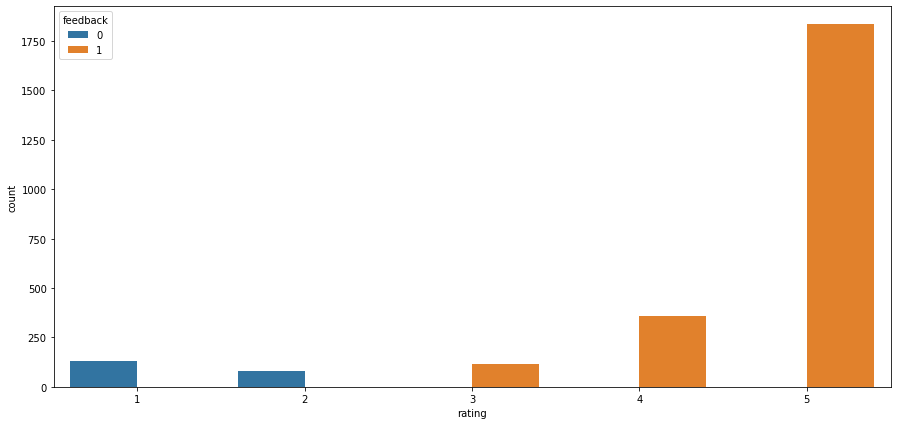

In [6]:
#Visualizing the data
# Rating vs feedback

# set figure size
plt.figure(figsize=(15,7))

# generate countplot
sns.countplot(x="rating", hue="feedback", data=df)

# display plot
plt.show()

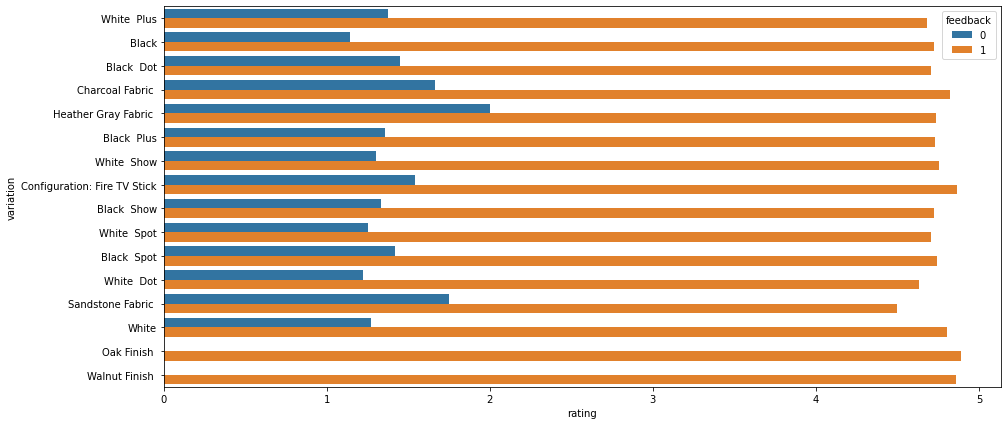

In [7]:
# Variation rating vs feedback

# set figure size
plt.figure(figsize=(15,7))

# generate barplot
sns.barplot(x="rating", y="variation", hue="feedback", data=df, ci = None)

# display plot
plt.show()

In [10]:
nltk.download('stopwords')
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# declare empty list 'corpus'
corpus=[]

# for loop to fill in corpus
for i in range(0,2520):
    # retain alphabets
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i] )
    # convert to lower case
    review=review.lower()
    # tokenize
    review=review.split()
    # initialize stemmer object
    ps=PorterStemmer()
    # perform stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # join elements of list
    review=' '.join(review)
    # add to 'corpus'
    corpus.append(review)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#Model Building
# import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Instantiate count vectorizer
cv = CountVectorizer(max_features=1500)

# Independent variable
X = cv.fit_transform(corpus).toarray()

# dependent variable
y = df['feedback']

# Counts
count = y.value_counts()
print(count)

1    2308
0     212
Name: feedback, dtype: int64


In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [15]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


# Instantiate calssifier
rf = RandomForestClassifier(random_state=2)

# fit model on training data
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# calculate the accuracy score
score = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)


# display 'score' and 'precision'
print(score, precision)

0.9345238095238095 0.9383983572895277


In [16]:
# import packages
from imblearn.over_sampling import SMOTE

# Instantiate smote
smote = SMOTE(random_state=9)

# fit_sample onm training data
X_train, y_train = smote.fit_sample(X_train, y_train)

# fit model on training data
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# calculate the accuracy score
score = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# display precision and score
print(score, precision)

0.8908730158730159 0.945054945054945


In [23]:
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')
test.head(10)

,Id,rating,date,variation,verified_reviews
0,2887,3,30-Jul-18,Black Dot,"No problems, works as expected. Could have a b..."
1,1934,5,26-Jul-18,Black Plus,"Great , love it."
2,142,5,30-Jul-18,Charcoal Fabric,"Great sound quality, great features, great pro..."
3,1072,4,30-Jul-18,Black Spot,"Terrific sound for a small device, and nice fo..."
4,2258,5,30-Jul-18,Configuration: Fire TV Stick,Use it all the time and love it. Very quality ...
5,1142,4,29-Jul-18,Black Spot,"Works decent, wish it was able to answer more ..."
6,1116,5,30-Jul-18,Black Spot,Great for checking in on my son after school w...
7,3042,5,30-Jul-18,White Dot,Love the dot
8,2832,5,30-Jul-18,Black Dot,Love my echo. Love playing music in my room
9,2626,5,30-Jul-18,White Dot,I love to watch my wife argue with Alexa. I w...


In [24]:
# Storing the id from the test file
id_ = test['Id']

In [25]:
# Apply the transformations on test
# Converting date attribute from string to datetime.date datatype 
test['date'] = pd.to_datetime(test['date'])

# calculate the total length of word
test['length'] = test['verified_reviews'].apply(len)

In [26]:
# declare empty list 'corpus'
corpus=[]

# for loop to fill in corpus
for i in range(0,630):
    # retain alphabets
    review = re.sub('[^a-zA-Z]', ' ', test['verified_reviews'][i] )
    # convert to lower case
    review=review.lower()
    # tokenize
    review=review.split()
    # initialize stemmer object
    ps=PorterStemmer()
    # perform stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # join elements of list
    review=' '.join(review)
    # add to 'corpus'
    corpus.append(review)
    
test = cv.transform(corpus).toarray()

In [27]:
# predict on test data
y_pred_test = rf.predict(test)

y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'feedback':y_pred_test})
print(sample_submission.head(10))

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test.csv',index=False)

     Id  feedback
0  2887         1
1  1934         1
2   142         1
3  1072         1
4  2258         1
5  1142         1
6  1116         1
7  3042         1
8  2832         1
9  2626         1
